In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

## importing the data

In [62]:
df=pd.read_csv('processed.cleveland.data',header=None)

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [64]:
df.columns=['age',
            'sex',
            'cp',
            'restbp',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'hd']
            
            
            
            

In [65]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## identifying missing data

In [66]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

2 cols have object type which says there is something suspecious

In [67]:
#print out unique values in the column 
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

this question mark represent missing data.
    

Dealing with missing data.
   remove the particuler row or
   do data imputation(calculating mean of the values and filling missing data with it)

In [68]:
#print out the row which contains missing values
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [69]:
len(df)

303

as only 6 out of 303 contains null values we can remove it rather than impute the values

2ways to drop

In [70]:
##1
import numpy as np
df.replace('?',np.nan,inplace=True)
df.dropna()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [19]:
##2nd way
df.drop(df[(df['ca']=='?') | (df['thal']=='?')].index)


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


## splitting the data into independent features and dependent features

In [71]:
x=df.drop('hd',axis=1).copy()
x.head(10)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0


In [72]:
y=df['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## one hot encoding

In [73]:
x_encoded=pd.get_dummies(x,columns=['cp','restecg','slope','thal'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [74]:
y.unique()

array([0, 2, 1, 3, 4])

in this we are only making a tree that does simple classification an only care if have heart disese or not ,so we need to convert all numbers >0 to 1

In [75]:
y=y.apply(lambda val:1 if val>0 else 0)

In [76]:
y.unique()

array([0, 1])

## building classification decision tree

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42)

clf_dt=DecisionTreeClassifier(random_state=42)#uses gini impurity by default
clf_dt= clf_dt.fit(x_train,y_train)

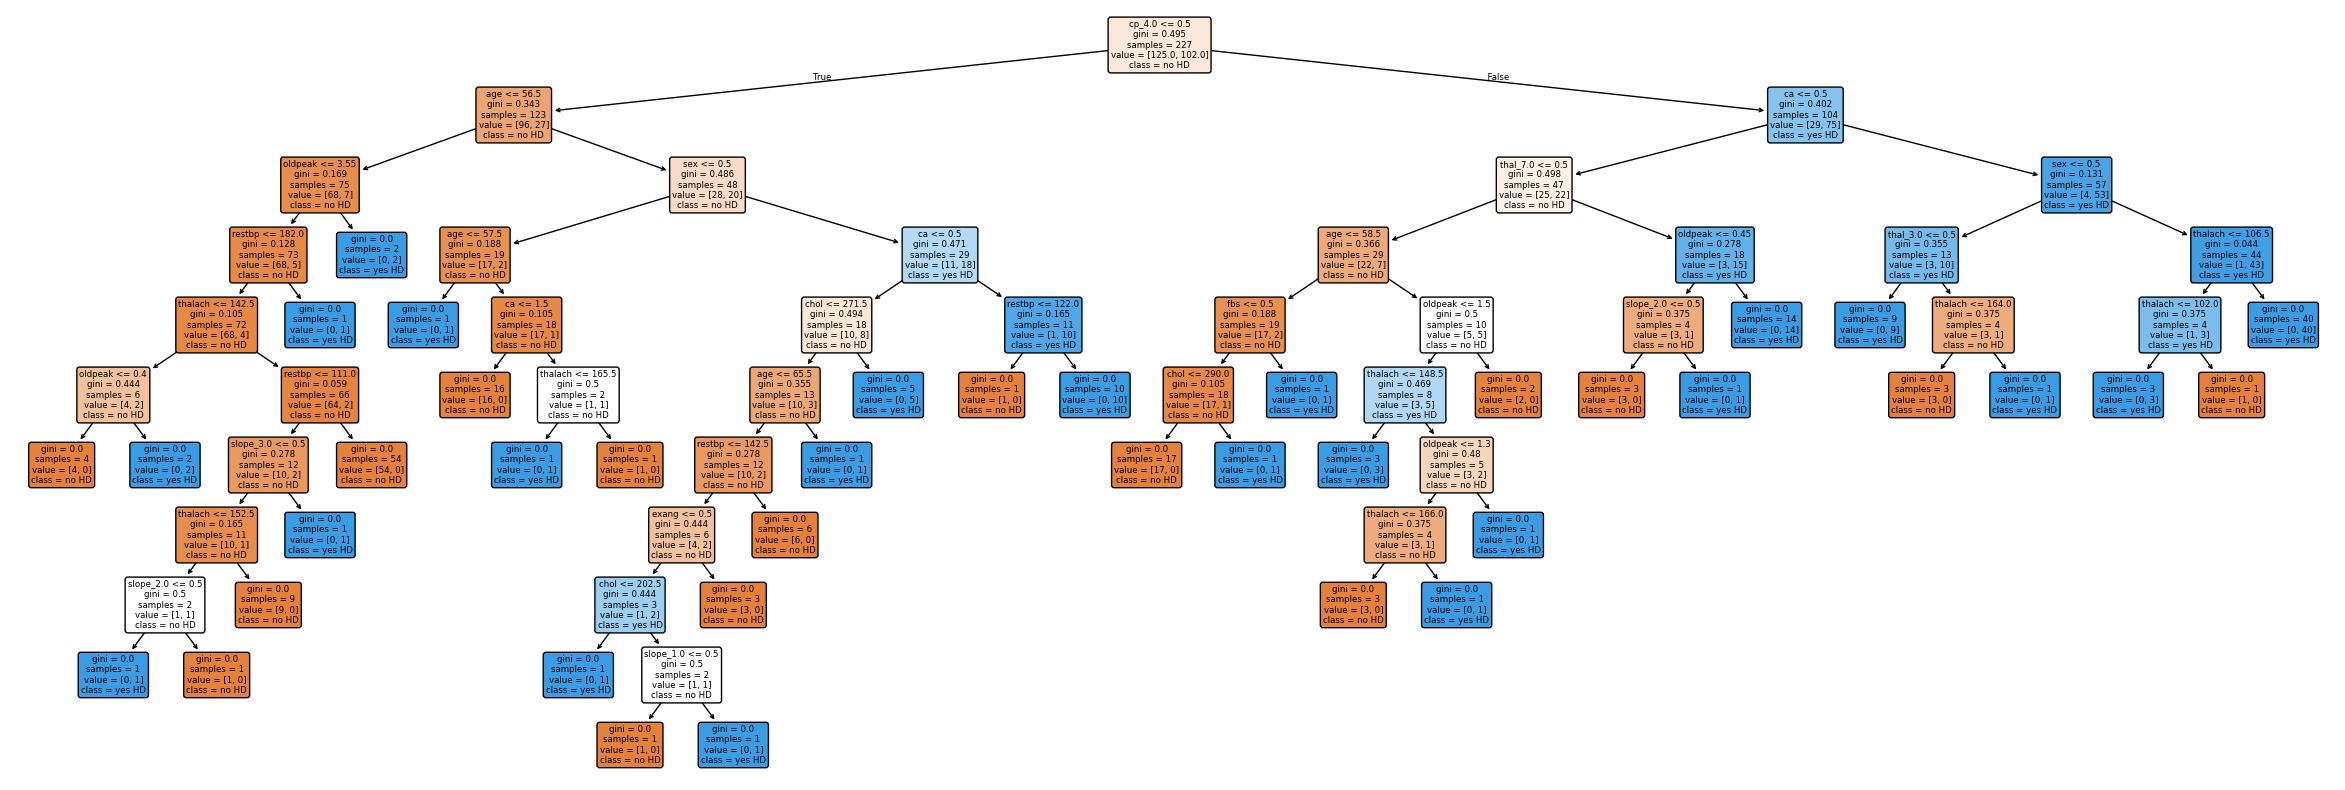

In [78]:
##plot thetree
plt.figure(figsize=(30,10))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['no HD','yes HD'],
         feature_names=x_encoded.columns);

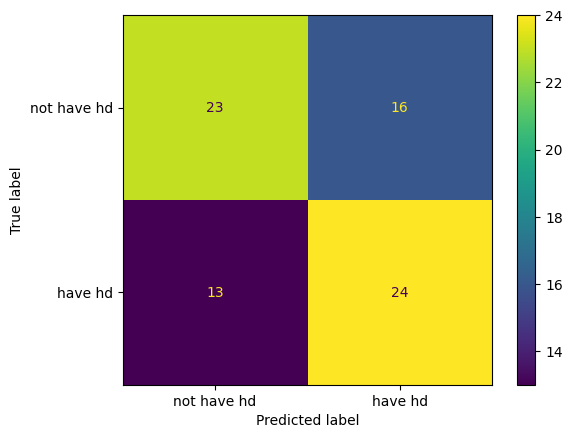

In [79]:
#plot confusion matrix with the test data
ConfusionMatrixDisplay.from_estimator(clf_dt,x_test,y_test,display_labels=["not have hd","have hd"])

can we do better?one this which might be holding this tree back is that it may have overfit the training dataset. 

so lets prune the tree.pruning in theory,solves the overfitting problem and gives us better results

## PREVENT OVERFITTING USING COST COMPLEXITY PURNING

In [80]:
path=clf_dt.cost_complexity_pruning_path(x_train,y_train)#determine values for alpha
##cost_complexity_pruning_path() does:
##It builds one full decision tree (with no pruning).

#Then it simulates pruning, from complex to simple.

#It returns:
  #A list of ccp_alpha values where each pruning step happens.
  #Corresponding total impurities.

ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

clf_dts=[] #it create an array which stores decision trees into it

#now create one decision tree for each value of alpha and stores it in th array
for alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)


 graphing the accuracy(score) of the trees using the training and test data as a function of alpha

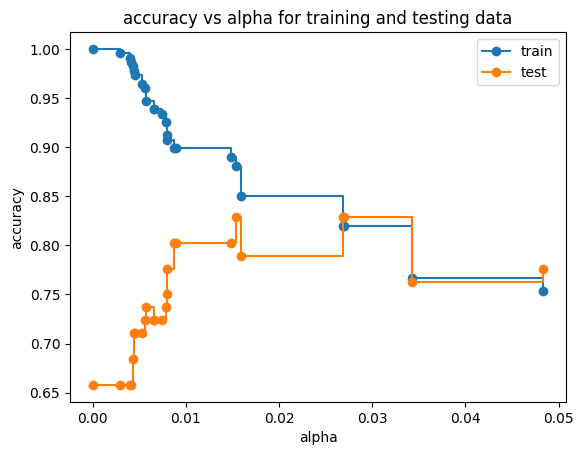

In [81]:
train_scores=[clf_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing data")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle="steps-post")
ax.legend()
plt.show()

In [82]:
best_index = np.argmax(test_scores)
print(f"Best alpha: {ccp_alphas[best_index]}")
print(f"Test accuracy: {test_scores[best_index]}")


Best alpha: 0.015418502202643174
Test accuracy: 0.8289473684210527


in the graph,we see accuracy for the testing dataset hits its maximum value when alpha is about 0.0154.

now we use this alpha to test accuracy for diiifernttraining and validation dataset using k fold cross validation 

<Axes: xlabel='tree'>

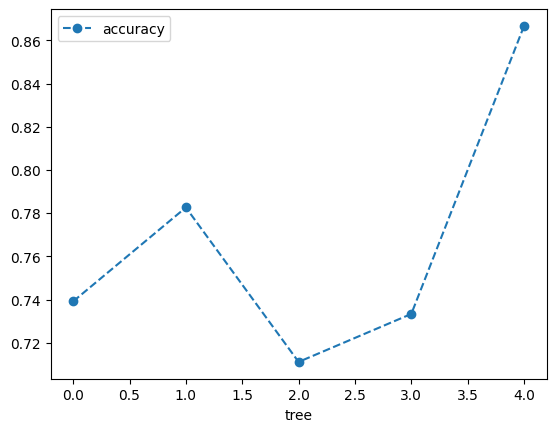

In [86]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.0154)

##now use 5 fold cross validation create 5 diff train and 
##test dataset and then use it to train and tst the tree
scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree', y='accuracy',marker='o',linestyle='--')

the graph above shows that using diff training and test data with same alpha resulted in different accuraces,suggesting that alpha is sensitive to data sets.so insted of picking a single training dataset and single testing dataset,lets use cross validation to find optimum alpha value

## cross validation for finding best alpha

choose array of alpha values ,for each alpha we will run 5 fold cross vaidation and then calculate mean of scores(accuracy)and standard deviation(error) of  each of the alpha and choose the alpha which have highest accuracy and least std


<Axes: xlabel='alpha'>

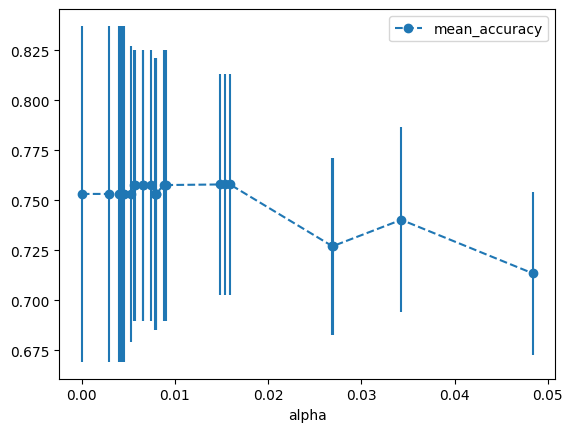

In [84]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
##draw a graph of the means amd stamdard deviations of the scores for each alpha

alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [85]:
print(alpha_results)

       alpha  mean_accuracy       std
0   0.000000       0.753140  0.084022
1   0.002937       0.753140  0.084022
2   0.004005       0.753140  0.084022
3   0.004161       0.753140  0.084022
4   0.004305       0.753140  0.084022
5   0.004405       0.753140  0.084022
6   0.004539       0.753140  0.084022
7   0.005286       0.753140  0.074024
8   0.005648       0.757585  0.067767
9   0.005727       0.757585  0.067767
10  0.006608       0.757585  0.067767
11  0.006608       0.757585  0.067767
12  0.007445       0.757585  0.067767
13  0.007883       0.753237  0.068113
14  0.007983       0.753237  0.068113
15  0.008010       0.753237  0.068113
16  0.008775       0.757585  0.067767
17  0.008994       0.757585  0.067767
18  0.014882       0.757874  0.055367
19  0.015419       0.757874  0.055367
20  0.015907       0.757874  0.055367
21  0.026869       0.727053  0.044242
22  0.026959       0.727053  0.044242
23  0.034289       0.740193  0.046178
24  0.048388       0.713430  0.040711


In [ ]:
ideal value of alpha is 0.01488 or 0.15419

In [88]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)&(alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

18    0.014882
Name: alpha, dtype: float64

In [90]:
##convert ideal alpha from series to float
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.01488222396556231

now we have the ideal value of alpha so,now build ,evaluvate and draw the final classification tree

## ***evaluvating and interpretating the final classification tree***

now build tree by setting.each value of alpha corresponds to each level of purning

In [93]:
clf_dt_purned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha) 
clf_dt_purned= clf_dt_purned.fit(x_train,y_train)

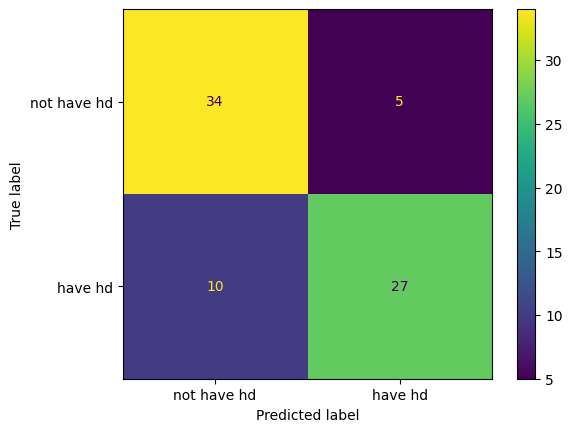

In [94]:
ConfusionMatrixDisplay.from_estimator(clf_dt_purned,x_test,y_test,display_labels=["not have hd","have hd"])

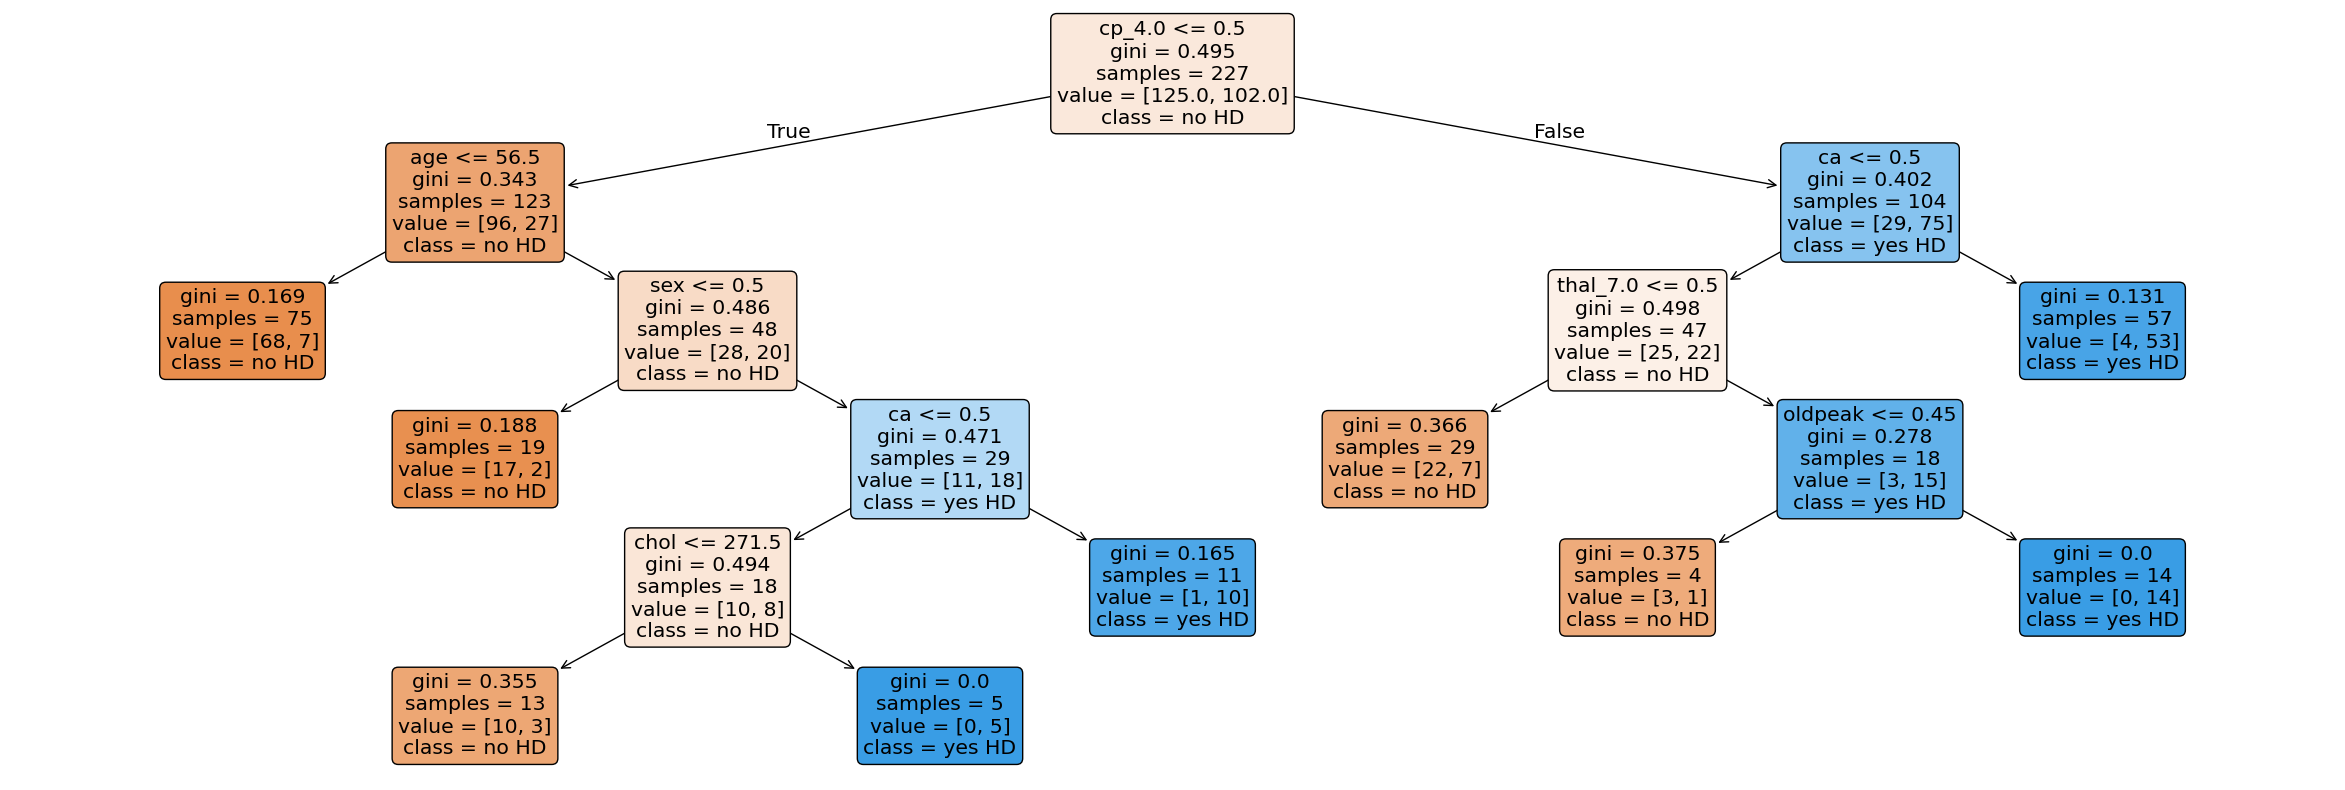

In [95]:
plt.figure(figsize=(30,10))
plot_tree(clf_dt_purned,
         filled=True,
         rounded=True,
         class_names=['no HD','yes HD'],
         feature_names=x_encoded.columns);